In [1]:
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

## 2. 그래프를 그리기 위해 임의의 데이터를 만들어 줍니다.

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([  -7,  -87,  -52,   13,  -44, -144,  -52,  -31,   20,  -59,   23,
         61,   84,   95,   23,  112,  121,   21,   97,  140,  120,  137,
        105,   32,  -39,   54,  -35,    7,   83,  180,  186,   91,   57,
        148,  203,  281,  242,  215,  119,  176,  236,  178,   99,  189,
        170,  195,  281,  361,  357,  286])

## 3. 기본 폰트로 지정되었기 때문에 한글이 깨져 나옵니다.

Text(0.5, 0, '시간(분)')

/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, fla

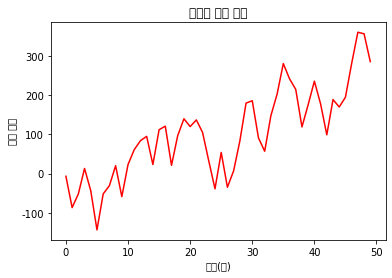

In [3]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

## 4. 폰트를 설정해 주기에 앞서 설치 된 matplotlib의 버전과 위치정보를 가져옵니다.

In [4]:
print('버전: ', mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.1
설치 위치:  /Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /Users/kmpak/.matplotlib
캐시 위치:  /Users/kmpak/.matplotlib


## 5. matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 가봅니다.

In [5]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


## 6. 설치 된 폰트를 찍어 봅니다.

In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체 개수
print(len(font_list))

349


In [7]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

302


/Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  


In [8]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

['/System/Library/Assets/com_apple_MobileAsset_Font5/3fddb8111efe16d8205664bb96798ec74e6e3728.asset/AssetData/TsukushiAMaruGothic.ttc',
 '/System/Library/Fonts/Kohinoor.ttc',
 '/Library/Fonts/STIXGeneralBolIta.otf',
 '/System/Library/Fonts/SFNSDisplay-ThinG2.otf',
 '/System/Library/Fonts/SFCompactRounded-Light.otf',
 '/System/Library/Assets/com_apple_MobileAsset_Font5/847635240837e5793fda173b8b9a2c8faa33306f.asset/AssetData/Hei.ttf',
 '/Library/Fonts/Lao MN.ttc',
 '/System/Library/Assets/com_apple_MobileAsset_Font5/79a8bad3d2172ee374c2d335a250d2f6175fd5e7.asset/AssetData/Hanzipen.ttc',
 '/System/Library/Fonts/GeezaPro.ttc',
 '/System/Library/Fonts/KohinoorTelugu.ttc']

In [9]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

349


['DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXGeneral']

In [10]:
# [f.name for f in fm.fontManager.ttflist if '' in f.name]

## 7. 나눔고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.
* 폰트를 설치했는데 원하는 폰트명을 가져오지 못 할때, 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시위치로 이동해서 캐시파일을 열어봅니다.
* 캐시파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

In [11]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('Nanum Brush Script',
  '/System/Library/Assets/com_apple_MobileAsset_Font5/89398fcde72f2206bbc162797eeb609f3f61fbd8.asset/AssetData/NanumScript.ttc'),
 ('Nanum Myeongjo',
  '/System/Library/Assets/com_apple_MobileAsset_Font5/ee22bff5339ff376c79ca4c0814d49d3cfacb68e.asset/AssetData/NanumMyeongjo.ttc'),
 ('Nanum Gothic',
  '/System/Library/Assets/com_apple_MobileAsset_Font5/5cacaa007b5810b9f023061183336403b9d5c20b.asset/AssetData/NanumGothic.ttc')]

## 8. 폰트를 사용하는 방법은 3가지가 있습니다.

    1) FontProperties 를 사용하는 방법 - 그래프의 폰트가 필요한 항목마다 지정해 주어야 합니다.
    2) matplotlib.rcParams[]으로 전역글꼴 설정 방법 - 그래프에 설정을 해주면 폰트가 필요한 항목에 적용 됩니다.
    3) 2)번의 방법을 mpl.matplotlib_fname()로 읽어지는 설정 파일에 직접 적어주는 방법, 단 모든 노트북에 적용됩니다. 노트북을 열 때마다 지정해 주지 않아도 돼서 편리합니다.

### 1) FontProperties 를 사용하는 방법
* 텍스트를 지정하는 항목에 지정해 사용할 수 있습니다. 지정해 준 항목에만 해당 폰트가 적용 됩니다.
* matplotlib.pyplot
    * title()
    * xlabel()
    * ylabel()
    * legend()
    * text()
* matplotlib.axes
    * set_title()

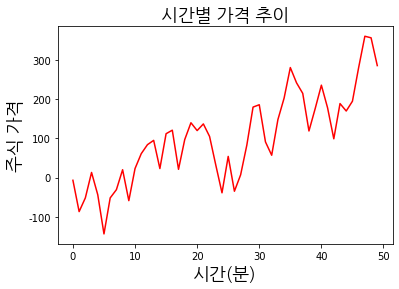

In [12]:
# fname 옵션을 사용하는 방법
path = '/System/Library/Assets/com_apple_MobileAsset_Font5/5cacaa007b5810b9f023061183336403b9d5c20b.asset/AssetData/NanumGothic.ttc'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.show()

### 2) matplotlib.rcParams[]으로 전역글꼴 설정 방법

In [13]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [14]:
# serif, sans-serif, monospace
print('serif 세리프가 있는 폰트--------')
print (plt.rcParams['font.serif']) 
print('sans-serif 세리프가 없는 폰트 --------')
print (plt.rcParams['font.sans-serif']) 
print('monospace 고정폭 글꼴--------')
print (plt.rcParams['font.monospace'])

serif 세리프가 있는 폰트--------
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
sans-serif 세리프가 없는 폰트 --------
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
monospace 고정폭 글꼴--------
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [15]:
plt.rcParams["font.family"] = 'Nanum Brush Script'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

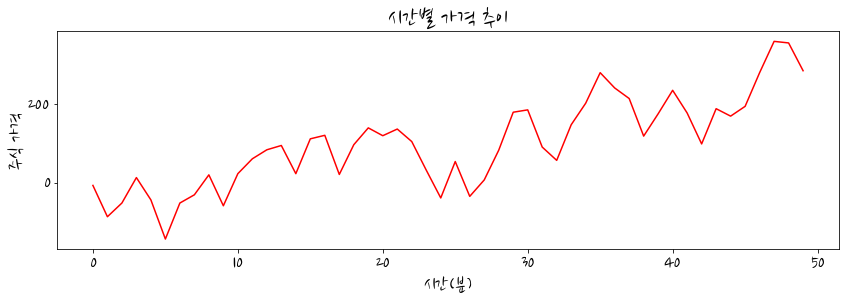

In [16]:
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

rcParams 대신 FontProperties 와 plt.rc 를 사용하는 방법

Nanum Gothic


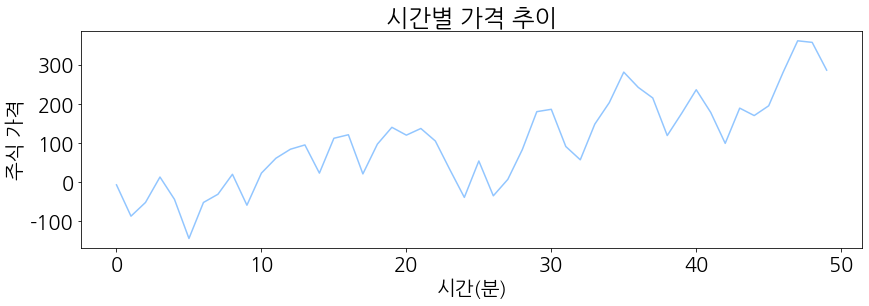

In [17]:
path = '/System/Library/Assets/com_apple_MobileAsset_Font5/5cacaa007b5810b9f023061183336403b9d5c20b.asset/AssetData/NanumGothic.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()

### 3) rcParams 를 설정파일에 직접 적어주는 방법 - 모든 노트북에 공통적용

* font.family : NanumGothicOTF
* 이 외에 자주 사용하는 설정도 함께 해주면 편리합니다.
* 이곳에 폰트를 지정해 주면 노트북을 실행할 때 바로 로드되도록 설정할 수 있습니다.

In [18]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /Users/kmpak/repo/data-analysis-note/venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


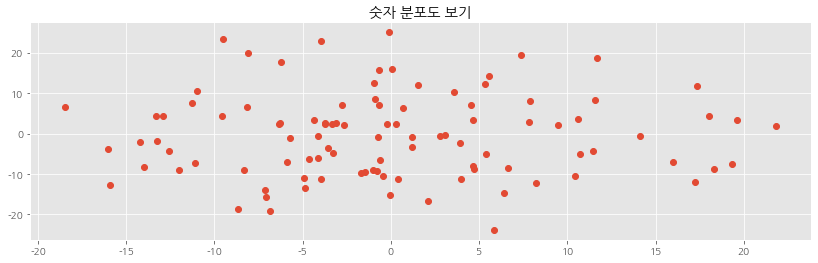

In [19]:
# import matplotlib.pyplot as plt
# import numpy as np

fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()